# Fourier Transformation

## Introduction

In this notebook we will learn how to apply the 1D Fourier Transformation. The Fourier Transformation is often used to do the transformation from the time domain to the frequency domain (and backwards). The goal is to split the signal into its frequency content.

Roughly explained:
This process is done in the easiest way by the fourier series ([Wiki](https://en.wikipedia.org/wiki/Fourier_series)). Hereby, sinus and cosine with different frequencies are sumed trying to recreate the original signals. The frequencies its amplitude are combined to create the fourier amplitude spectrum.


DFT? is used...


## Table of Contents
- [Fast Fourier Transform](#Fast_Fourier_Transform)
- [Testing Different Frequencies](#Testing_Different_Frequencies)
- [Multiple Frequencies](#Multiple_Frequencies)
- [Specials](#Specials)



# What about phase spectrum?????

<a id='Fast_Fourier_Transform'></a> 
# Fast Fourier Transform
The fft is a numerical fast way of doing the transformation.
There is also the inverse-transformation: from frequency domain to the time domain.

In [1]:
import numpy as num
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df
#print(x)

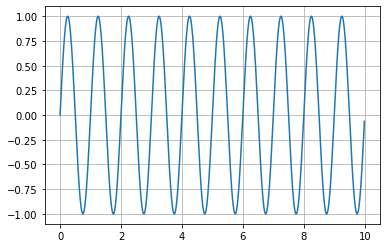

In [3]:
fr1 = 1 # frequency of signal  [Hz], inverse of periode
ydata = num.sin(2 * num.pi * fr1 * x) #+ num.random.normal(0, 0.1, len(x))

plt.figure()
plt.plot(x, ydata)
plt.grid()
plt.show()

For the Fourier Transform in Numpy, we can use the either the ['rfft'](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html) (real values only) or ['fft'](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) (full spectra, with imaginary values). For most cases the rfft is sufficient. 
Additionally the fourier transformation produces the amplitude spectrum and the phase spectrum. In most of the cases the phase information is not relevant. As in general, its interpretation is hard. Therefore, it is often neglected and if one mentions fourier spectrum the amplitude spectrum is meant. 

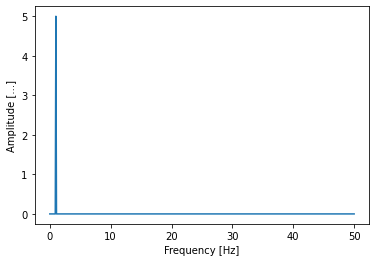

In [5]:
# Apply the ft - fft stands for fast-fourier-transform
ft = num.fft.rfft(ydata)

# To get the amplitude spectrum, only the real values are of interest - absolute
amps = abs(ft) * dt

# Creating the corresponding frequencies
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure()
plt.plot(freqs, amps)
#plt.semilogx(freqs, amps)
#plt.loglog(freqs, amps)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [...]')
plt.show()

In [ ]:
# phase =  num.angle(ft)
# plt.figure()
# plt.plot(freqs, phase / num.pi)
# plt.show()

# plt.figure()
# plt.phase_spectrum(ydata, Fs=1/dt)
# plt.show()

<a id='Testing_Different_Frequencies'></a> 
# Testing Different frequencies
### Tasks:
- Play with the frequency of the sinus and the see the changes in the spectrum.

Take into account that the valid frequencies depend on your data.

- The highest possible frequency that can be displayed depends on the sampling rate. Here the [Nyquist(-Shannon)-Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) plays an important role. In short: frequencies higher than half of your sampling rate cannot be displayed correctly. That is why your x-axis in the example only shows maximum 50 Hz (df/2).
-> Try frequencies: e.g. 40 and 60 Hz

- The lowest possible frequency depends on the length of your data.
-> Try frequencies: lower than 0.1 Hz

In [ ]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df
#print(x)

fr1 = 1 # frequency of signal  [Hz]
ydata = num.sin(2 * num.pi * fr1 * x)

# Get amplitudes and frequencies
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

<a id='Multiple_Frequencies'></a> 
# Multiple Frequencies
The investigated what the Fourier Transformation is capable of we add multiple frequencies, which cannot be distuiged directly in terms of frequency content by us.

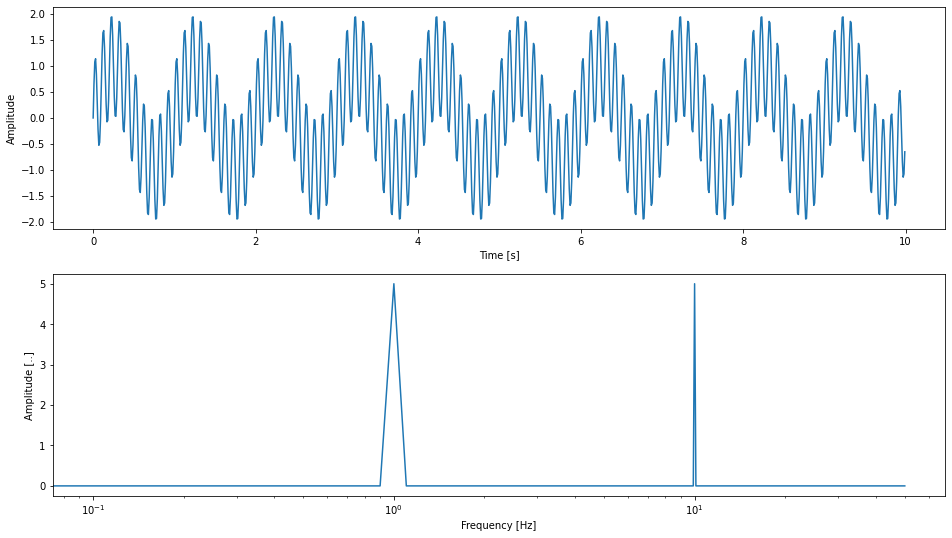

In [6]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

fr1 = 1.
fr2 = 10.
ydata = num.sin(2 * num.pi * fr1 * x) + num.sin(2 * num.pi * fr2 * x)

# Get amplitudes and frequencies
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

The fft does not distinguish between cosine and sinus, as it only evaluates the frequency content of a signal, independent of its origin. Meaning two different wavesforms can produce the same amplitude spectrum. As the FFT and its inverse are "unqie and reversable" functions, the differences between sinus and cosine are present in the phase spectra.
### Taks
- change the sinus and cosine
- add noise to the data

In [ ]:
fr1 = 1.
fr2 = 10.
ydata = num.sin(2 * num.pi * fr1 * x) + num.cos(2 * num.pi * fr2 * x)

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
plt.show()

<a id='Specials'></a> 
# Specials
In the following some special case are shown to demonstrate what the fft is capable of.

E.g. 
- a peak in time corresponds to a horizontal line in frequency (all frequencies)
- a lot of frequencies

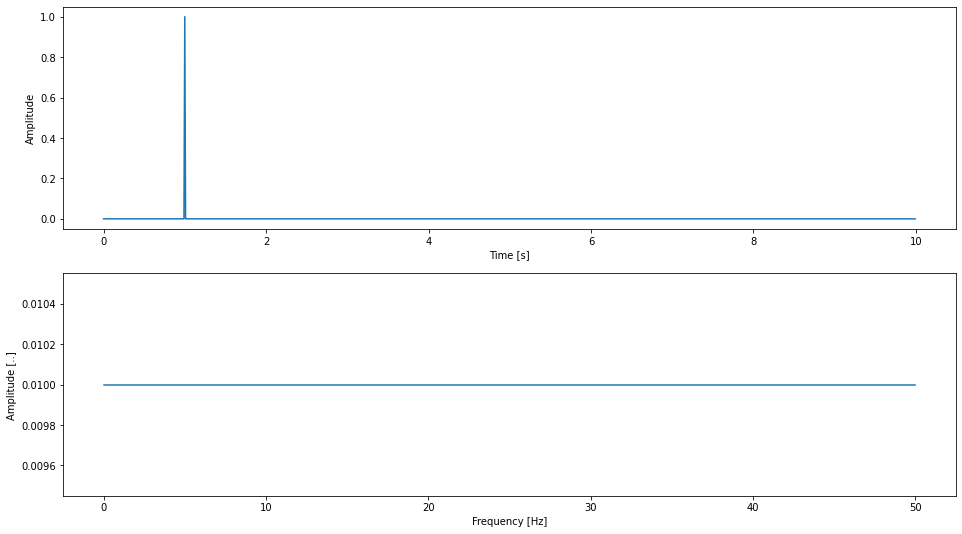

In [7]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Creating a array full of zeros
ydata = num.zeros(numsamples)

## single peak
# ydata[99] = 0.5
ydata[100] = 1
# ydata[101] = 0.5

## box
# ydata[100:200] = 1

ft = num.fft.rfft(ydata)

amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')

plt.show()

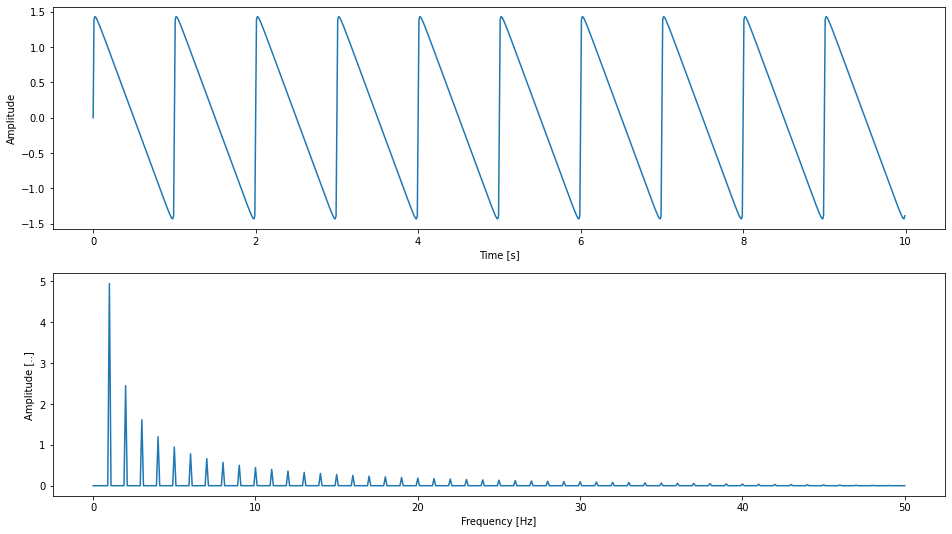

In [9]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

frequencies = num.linspace(1, 100, 100)
# print(frequencies)

ydata = num.zeros(numsamples)
for ff in frequencies:
    ydata += (1/ff) * num.sin(2 * num.pi * ff * x)
    #ysignal += ff * num.sin(2 * num.pi * ff * x)

ft = num.fft.rfft(ydata)
amps = abs(ft) * dt
freqs = num.fft.rfftfreq(numsamples, d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')

plt.show()

# Summary

We have learned the basic behaviour of the fourier transformation. It is used to analyze the frequency content of a signal, for most of our applications in the time domain. We have seen its application to different signal, including single, multiple frequencies and noise.